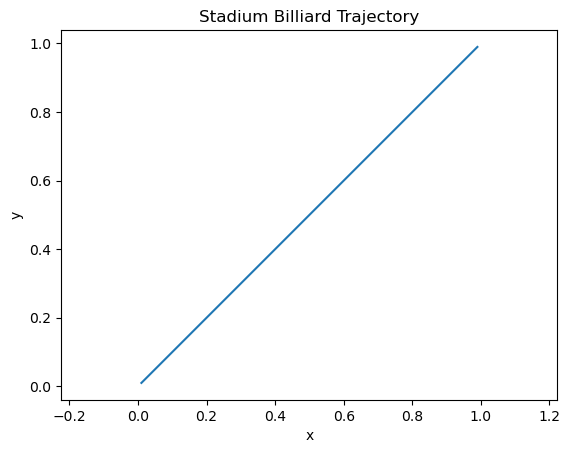

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Stadium parameters
a = 3.0  # half-length of rectangle
b = 1.0  # half-width of rectangle
rx = 2.0 # ellipse cap radius x
ry = 1.0 # ellipse cap radius y

def is_in_stadium(x, y, a, b, rx, ry):
    # Rectangle region
    if abs(x) <= a and abs(y) <= b:
        return True
    # Left ellipse cap
    if (x <= -a) and (((x + a)**2) / rx**2 + (y**2) / ry**2 <= 1):
        return True
    # Right ellipse cap
    if (x >= a) and (((x - a)**2) / rx**2 + (y**2) / ry**2 <= 1):
        return True
    return False

def reflect(x, y, vx, vy, a, b, rx, ry):
    # Collision with horizontal walls
    if abs(y) >= b and abs(x) <= a:
        vy = -vy
    # Collision with ellipse caps
    elif (x <= -a and ((x + a)**2) / rx**2 + (y**2) / ry**2 >= 1) or \
         (x >= a and ((x - a)**2) / rx**2 + (y**2) / ry**2 >= 1):
        vx = -vx
    return vx, vy

# Initial conditions
x, y = 0.0, 0.0
vx, vy = 1.0, 1.0
dt = 0.01
steps = 100000

trajectory_x = []
trajectory_y = []

for _ in range(steps):
    x_new = x + vx * dt
    y_new = y + vy * dt
    if not is_in_stadium(x_new, y_new, a, b, rx, ry):
        vx, vy = reflect(x, y, vx, vy, a, b, rx, ry)
    else:
        x, y = x_new, y_new
    trajectory_x.append(x)
    trajectory_y.append(y)

plt.plot(trajectory_x, trajectory_y)
plt.title('Stadium Billiard Trajectory')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()